In [306]:
# Data manipulation and analysis
import pandas as pd          # For data manipulation and analysis
import numpy as np           # For numerical operations

# Data visualization
import matplotlib.pyplot as plt  # For plotting data
import seaborn as sns            # For enhanced data visualization

# Scikit-learn for machine learning
from sklearn.model_selection import train_test_split  # For splitting the dataset into training and testing sets
from sklearn.linear_model import LinearRegression     # For linear regression model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score  # For model evaluation
from sklearn.preprocessing import LabelEncoder
# Optional: If you need to scale the data (e.g., standardize features)
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("D:/pythonprojects/data/train.csv")

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


RL: Residential Low Density
RM: Residential Medium Density
FV: Floating Village Residential
RH: Residential High Density
C (all): Commercia

In [307]:
df["MSZoning"] = {}

In [308]:
# Drop columns with too many missing values or irrelevant information
df.drop(['Alley', 'PoolQC', 'MiscFeature',"Fence"],axis = 1,inplace= True)
print(df.isnull().sum())
print(df.head())

Id                  0
MSSubClass          0
MSZoning         1460
LotFrontage       259
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
Length: 77, dtype: int64
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60      NaN         65.0     8450   Pave      Reg         Lvl   
1   2          20      NaN         80.0     9600   Pave      Reg         Lvl   
2   3          60      NaN         68.0    11250   Pave      IR1         Lvl   
3   4          70      NaN         60.0     9550   Pave      IR1         Lvl   
4   5          60      NaN         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside  ...             0         0           0        0   
1    AllPub       FR2  ...             0         0           0        0   
2    AllPub    Inside  ... 

In [309]:
zoning_types = df["MSZoning"].unique()
zoning_types

array([nan], dtype=object)

In [310]:
lot = df["LotFrontage"]
# Inspect the column and check for missing values
print(df['LotFrontage'].describe())
print(df['LotFrontage'].isnull().sum())

# Example: Impute missing values with the median
df['LotFrontage'].fillna(df['LotFrontage'].median(), inplace=True)
lot = df["LotFrontage"].isnull().sum()
print(lot)

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
259
0


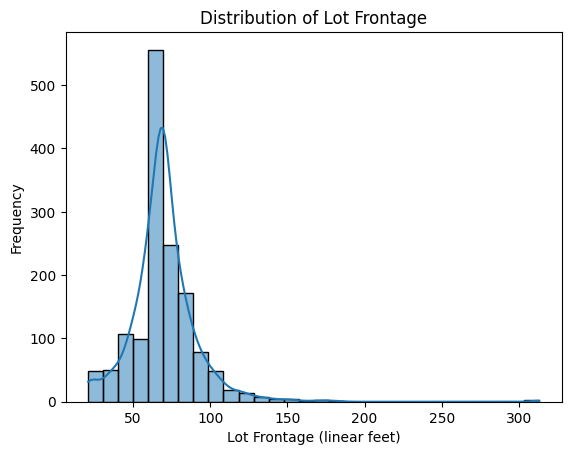

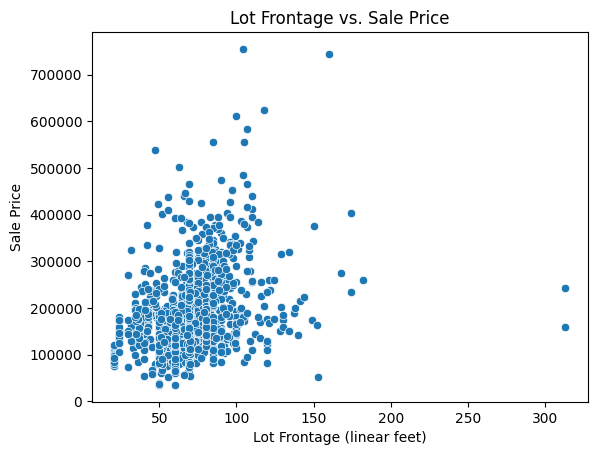

In [311]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution plot
sns.histplot(df['LotFrontage'], bins=30, kde=True)
plt.title('Distribution of Lot Frontage')
plt.xlabel('Lot Frontage (linear feet)')
plt.ylabel('Frequency')
plt.show()

# Scatter plot to see relationship with house prices
sns.scatterplot(x=df['LotFrontage'], y=df['SalePrice'])
plt.title('Lot Frontage vs. Sale Price')
plt.xlabel('Lot Frontage (linear feet)')
plt.ylabel('Sale Price')
plt.show()


In [312]:
print(df["LotArea"].describe(),df["LotArea"].head())



count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
25%        7553.500000
50%        9478.500000
75%       11601.500000
max      215245.000000
Name: LotArea, dtype: float64 0     8450
1     9600
2    11250
3     9550
4    14260
Name: LotArea, dtype: int64


In [313]:
street_types = df["Street"].unique()
print(street_types)



['Pave' 'Grvl']


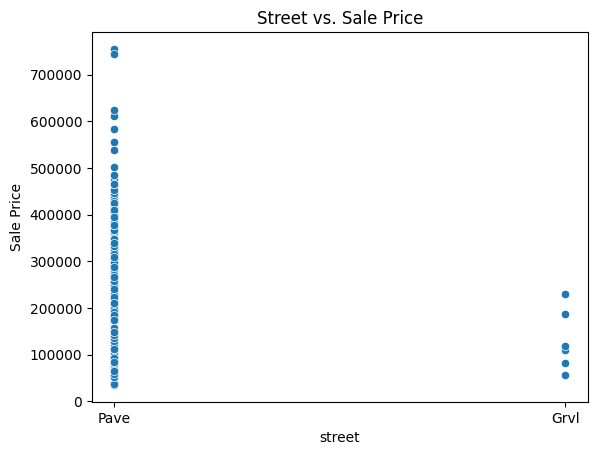

In [314]:

sns.scatterplot(x=df['Street'], y=df['SalePrice'])
plt.title('Street vs. Sale Price')
plt.xlabel('street')
plt.ylabel('Sale Price')
plt.show()


In [315]:
print(df.columns.tolist())

['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSol

In [316]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       0 non-null      object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [317]:
# selected_columns = df[["Utilities","LotConfig","LandSlope","Neighborhood","Condition1","Condition2",
#                        "BldgType","HouseStyle"]]
# print(selected_columns.drop_duplicates())

print(
    f"LandContour: {df['LandContour'].unique()}\n"
    f"Street: {df['Street'].unique()}\n"
    f"LotShape: {df['LotShape'].unique()}\n"
    
    f"Utilities: {df['Utilities'].unique()}\n"
    f"LotConfig: {df['LotConfig'].unique()}\n"
    f"LandSlope: {df['LandSlope'].unique()}\n"
    f"Neighborhood: {df['Neighborhood'].unique()}\n"
    f"Condition1: {df['Condition1'].unique()}\n"
    f"Condition2: {df['Condition2'].unique()}\n"
    f"BldgType: {df['BldgType'].unique()}\n"
    f"HouseStyle: {df['HouseStyle'].unique()}"
)



LandContour: ['Lvl' 'Bnk' 'Low' 'HLS']
Street: ['Pave' 'Grvl']
LotShape: ['Reg' 'IR1' 'IR2' 'IR3']
Utilities: ['AllPub' 'NoSeWa']
LotConfig: ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope: ['Gtl' 'Mod' 'Sev']
Neighborhood: ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1: ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Condition2: ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
BldgType: ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
HouseStyle: ['2Story' '1Story' '1.5Fin' '1.5Unf' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin']


In [318]:
# def columns():
#     columns_encode = df[["Street", "LotShape","LandContour","Utilities","LotConfig","LandSlope","Neighborhood","Condition1","Condition2",
#                      "BldgType","HouseStyle","MSZoning"]]
#     return columns_encode

In [319]:
#functin for label encoder
def label(df):
    label_encoder = LabelEncoder()  
    object_columns = df.select_dtypes(include=['object']).columns
    
    for column in object_columns:
        df[column] = label_encoder.fit_transform(df[column])
    
    return df  

dictionary mapping

In [320]:
def encode_columns(df):
    column_mappings = {}
    
    object_columns = df.select_dtypes(include=['object']).columns
    for column in object_columns:
        
        label_encoder = LabelEncoder()
        df[column] = label_encoder.fit_transform(df[column])
        #dictionary mapping
        column_mappings[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
    
    for column, mapping in column_mappings.items():
        print(f"{column} Mapping:")
        for key, value in mapping.items():
            print(f"  {key}: {value}")
        print()  



In [321]:
print((encode_columns(df)))





MSZoning Mapping:
  nan: 0

Street Mapping:
  Grvl: 0
  Pave: 1

LotShape Mapping:
  IR1: 0
  IR2: 1
  IR3: 2
  Reg: 3

LandContour Mapping:
  Bnk: 0
  HLS: 1
  Low: 2
  Lvl: 3

Utilities Mapping:
  AllPub: 0
  NoSeWa: 1

LotConfig Mapping:
  Corner: 0
  CulDSac: 1
  FR2: 2
  FR3: 3
  Inside: 4

LandSlope Mapping:
  Gtl: 0
  Mod: 1
  Sev: 2

Neighborhood Mapping:
  Blmngtn: 0
  Blueste: 1
  BrDale: 2
  BrkSide: 3
  ClearCr: 4
  CollgCr: 5
  Crawfor: 6
  Edwards: 7
  Gilbert: 8
  IDOTRR: 9
  MeadowV: 10
  Mitchel: 11
  NAmes: 12
  NPkVill: 13
  NWAmes: 14
  NoRidge: 15
  NridgHt: 16
  OldTown: 17
  SWISU: 18
  Sawyer: 19
  SawyerW: 20
  Somerst: 21
  StoneBr: 22
  Timber: 23
  Veenker: 24

Condition1 Mapping:
  Artery: 0
  Feedr: 1
  Norm: 2
  PosA: 3
  PosN: 4
  RRAe: 5
  RRAn: 6
  RRNe: 7
  RRNn: 8

Condition2 Mapping:
  Artery: 0
  Feedr: 1
  Norm: 2
  PosA: 3
  PosN: 4
  RRAe: 5
  RRAn: 6
  RRNn: 7

BldgType Mapping:
  1Fam: 0
  2fmCon: 1
  Duplex: 2
  Twnhs: 3
  TwnhsE: 4

HouseSty

correlation heatmap

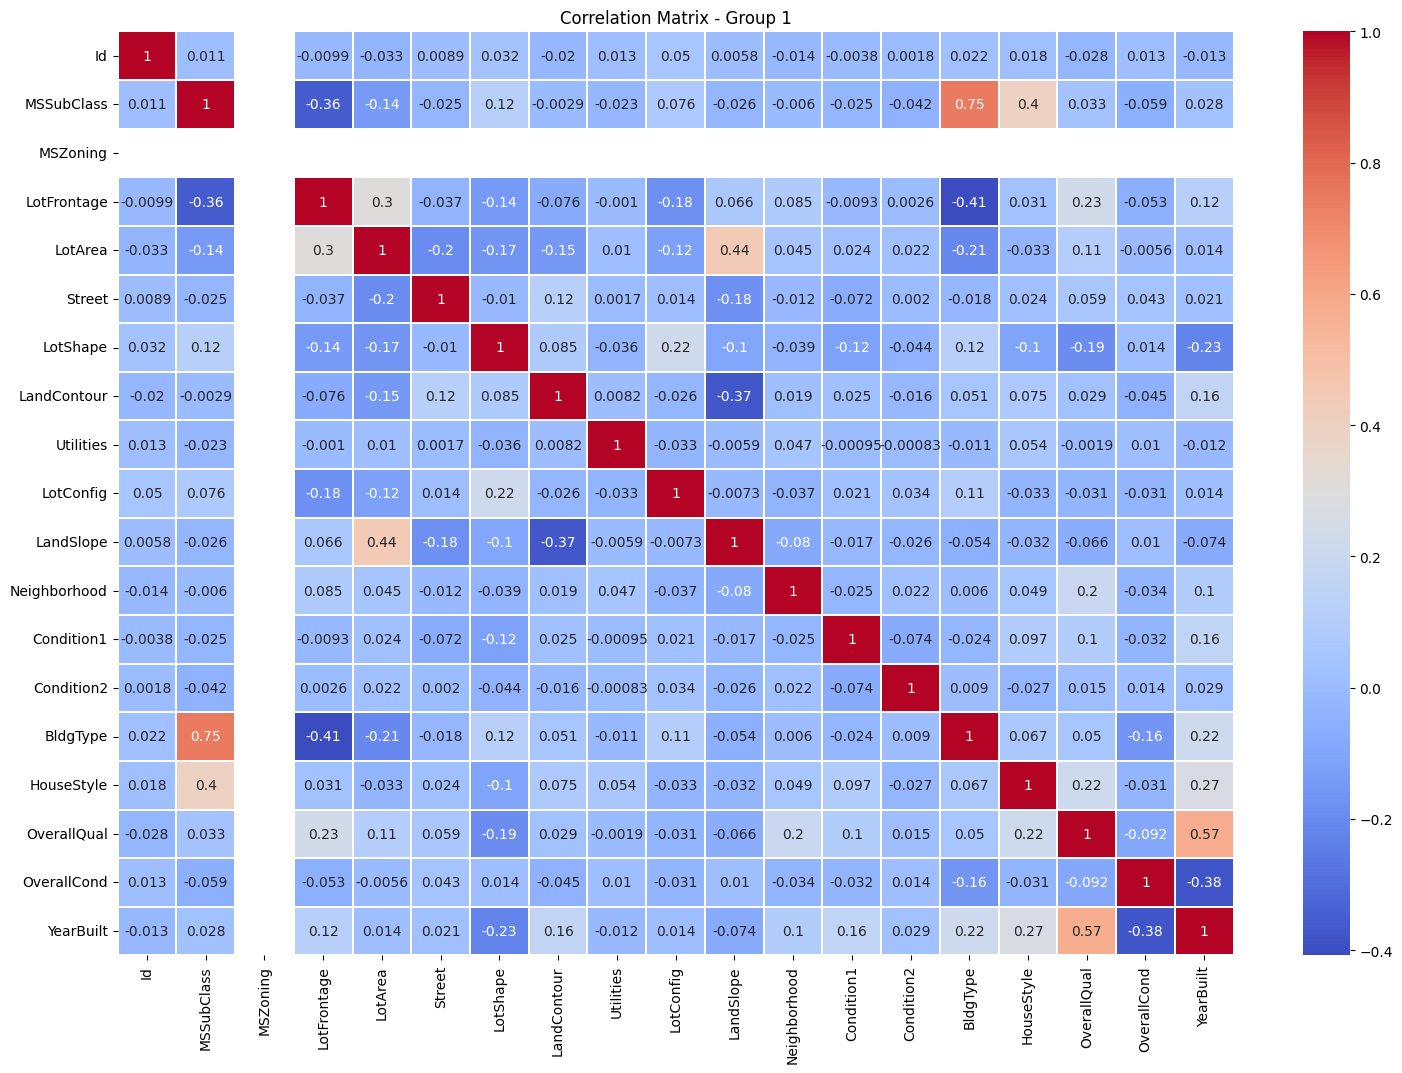

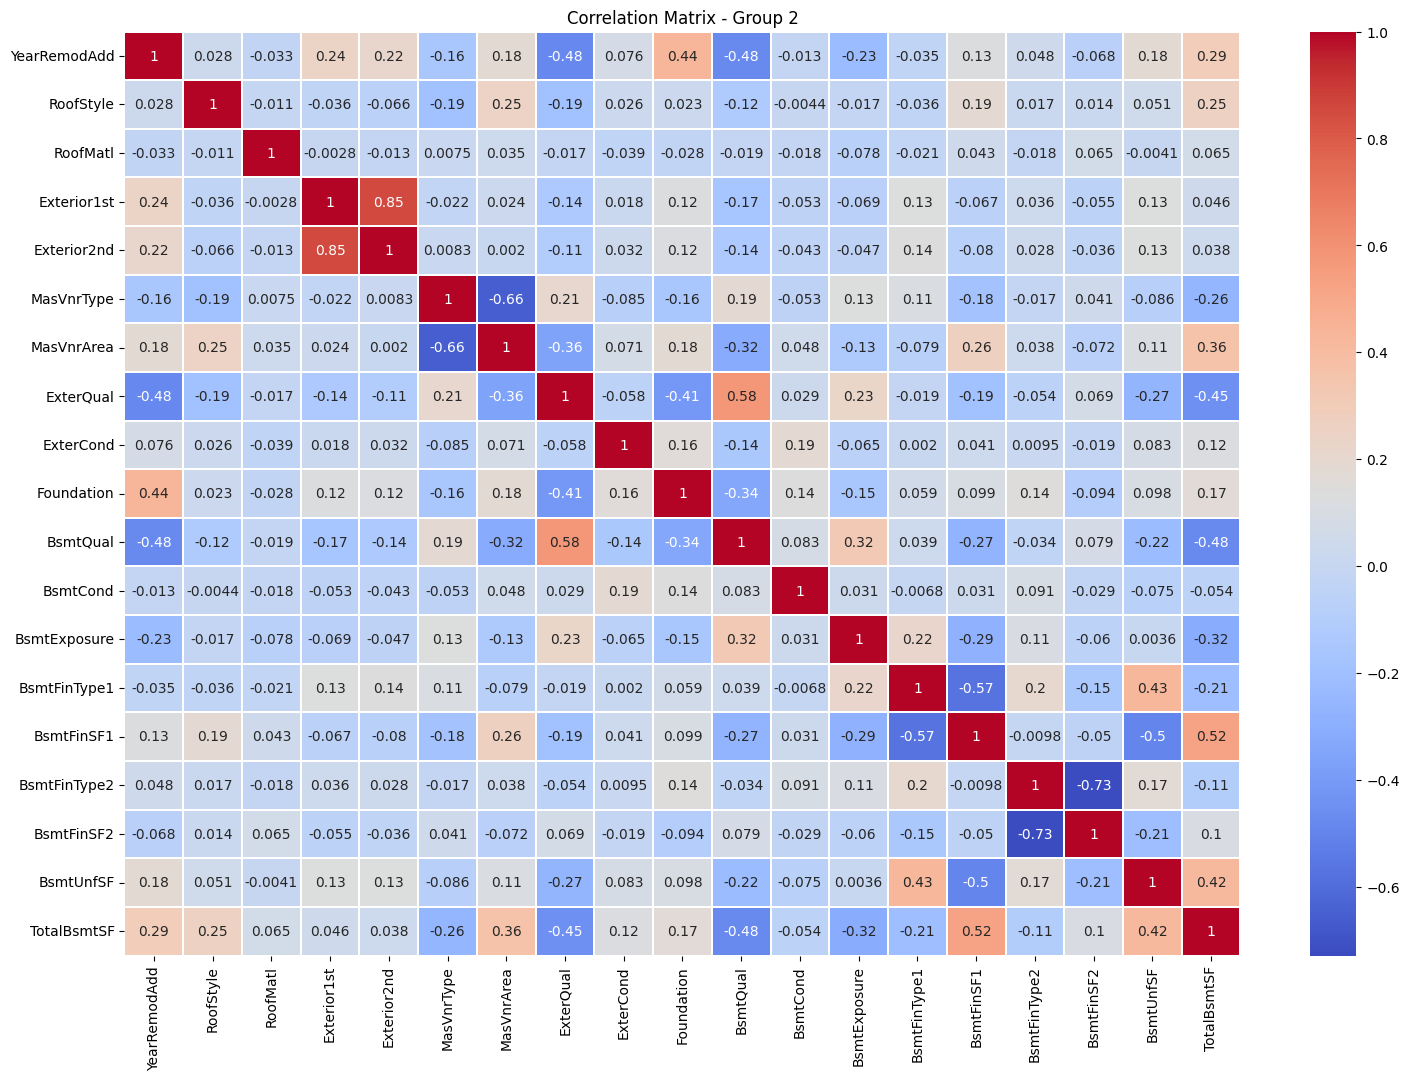

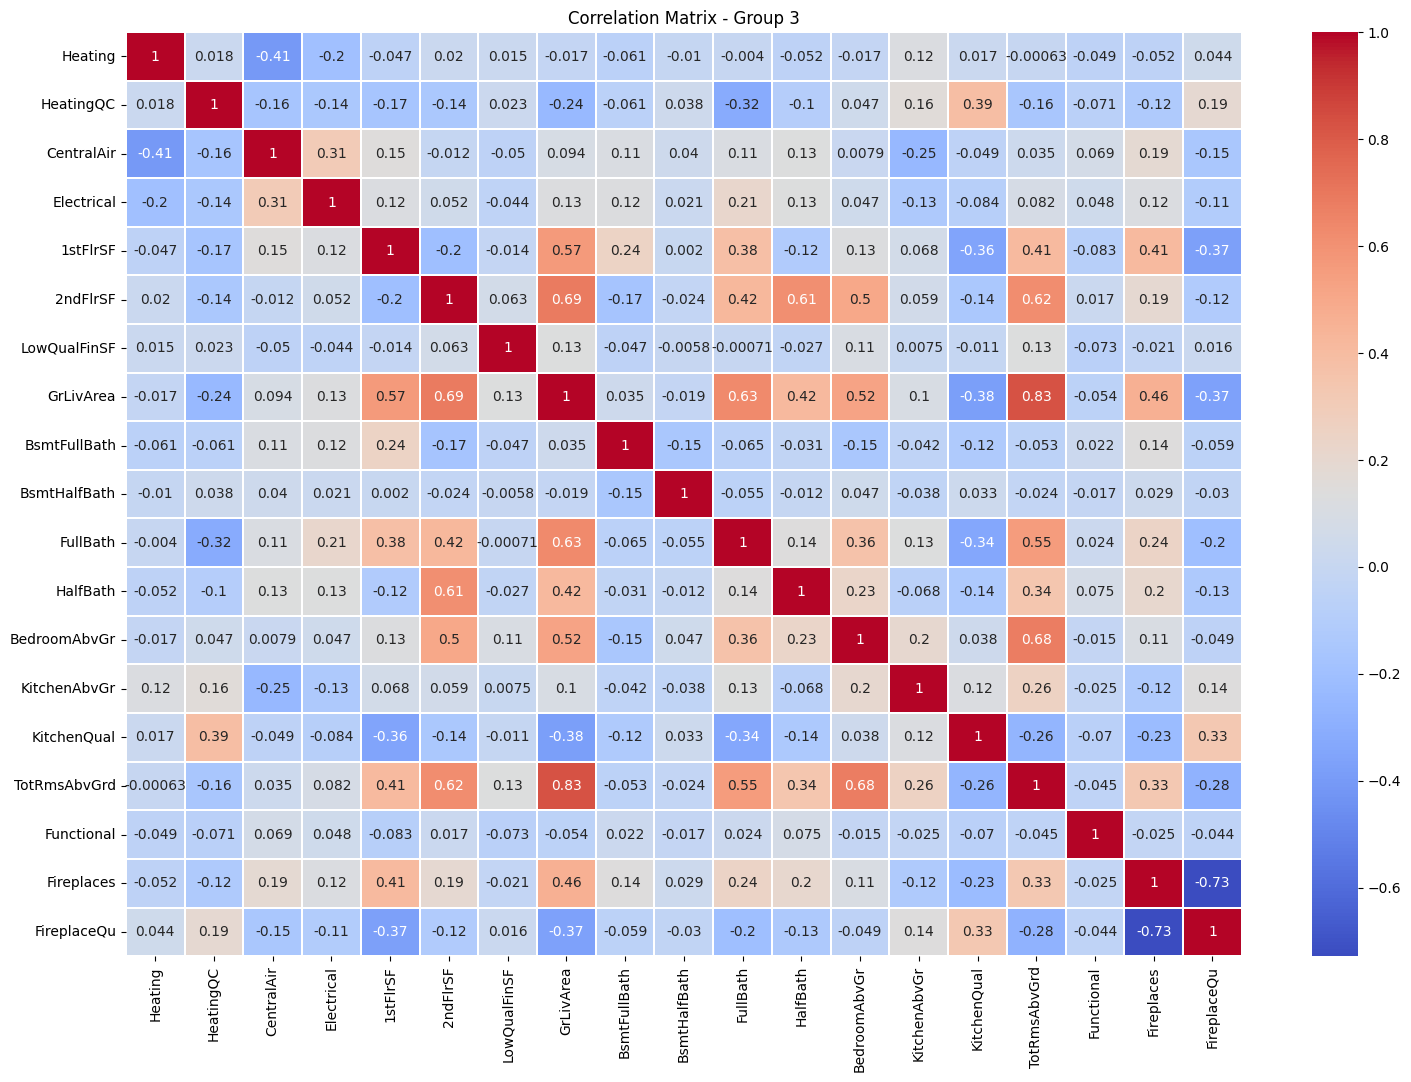

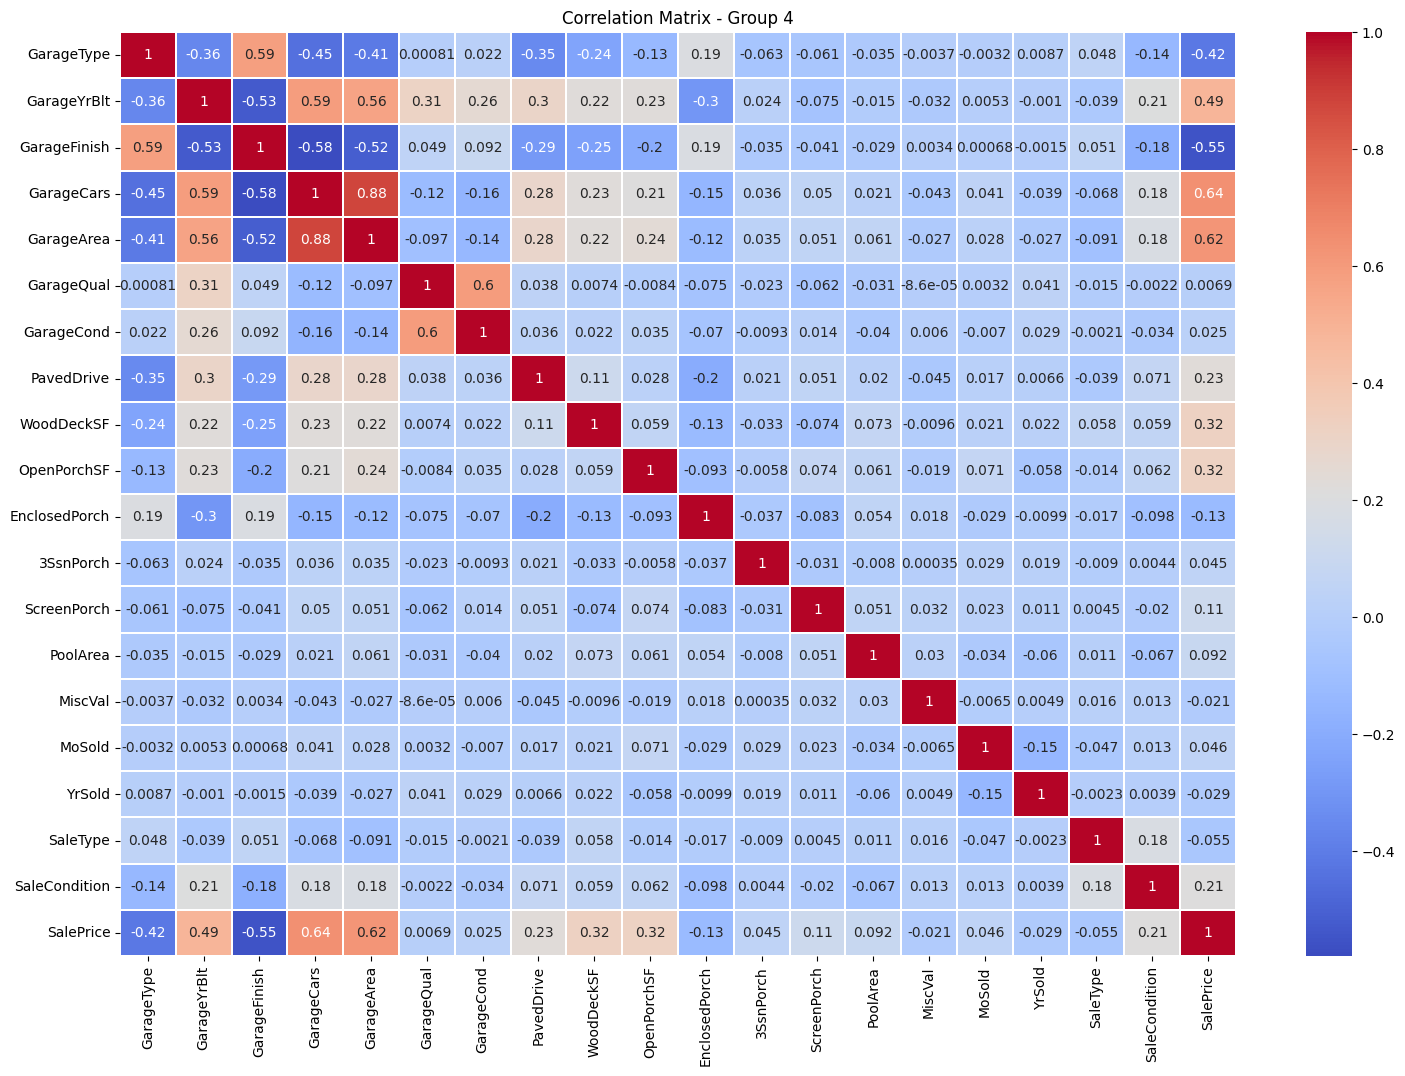

In [323]:
n = len(df.columns)
columns_group_1 = df.columns[:n//4]
columns_group_2 = df.columns[n//4:n//2]
columns_group_3 = df.columns[n//2:3*n//4]
columns_group_4 = df.columns[3*n//4:]

def plot_correlation_heatmap(df, columns, title):
    correlation_matrix = df[columns].corr()
    
    
    plt.figure(figsize=(18, 12)) 
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.1)
    plt.title(title)  
    plt.show()

plot_correlation_heatmap(df, columns_group_1, "Correlation Matrix - Group 1")
plot_correlation_heatmap(df, columns_group_2, "Correlation Matrix - Group 2")
plot_correlation_heatmap(df, columns_group_3, "Correlation Matrix - Group 3")
plot_correlation_heatmap(df, columns_group_4, "Correlation Matrix - Group 4")
